<a href="https://colab.research.google.com/github/DonaFidele/DeliveryOptimizationAnalysis/blob/main/trips_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRIPS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import folium


In [2]:
trips = pd.read_csv("trips.csv",index_col=0)
print(trips.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103894 entries, 0 to 181327
Data columns (total 54 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   created_at                            103894 non-null  object 
 1   user                                  103894 non-null  object 
 2   driver                                81705 non-null   object 
 3   city                                  103894 non-null  object 
 4   country                               103894 non-null  object 
 5   service                               103894 non-null  object 
 6   providerLocation_when_get_request     103894 non-null  object 
 7   destinationLocation                   103894 non-null  object 
 8   providerLocation                      103894 non-null  object 
 9   provider_location_to_pickup_distance  103894 non-null  float64
 10  promo_payment                         103894 non-null  int64  
 11  

In [3]:
print(trips.shape)

(103894, 54)


In [4]:
print(trips.head())

                       created_at      user   driver     city country  \
index                                                                   
0      2021-06-01 00:00:45.825000  U_620443  D_19374     Lome    Togo   
1      2021-06-01 00:03:46.748000  U_570883  D_11832  Parakou   Benin   
3      2021-06-01 00:04:11.567000   U_03628      NaN     Lome    Togo   
4      2021-06-01 00:07:59.870000  U_376951  D_68144     Lome    Togo   
6      2021-06-01 00:11:19.831000  U_999184  D_91842     Lome    Togo   

       service providerLocation_when_get_request     destinationLocation  \
index                                                                      
0          Zem            [6.2060932, 1.2537946]  [6.1833133, 1.2368867]   
1          Zem            [9.3272261, 2.6177889]   [9.321576, 2.6284832]   
3          Zem                                []  [6.1663386, 1.2665748]   
4          Zem            [6.2262907, 1.2019779]  [6.2090403, 1.2041535]   
6      Voiture            [6.167

In [5]:
print(trips.isna().any())

created_at                              False
user                                    False
driver                                   True
city                                    False
country                                 False
service                                 False
providerLocation_when_get_request       False
destinationLocation                     False
providerLocation                        False
provider_location_to_pickup_distance    False
promo_payment                           False
acceptance_time                         False
notification_time                       False
start_time                              False
completion_time                         False
user_create_location                    False
user_cancel_location                    False
provider_cancel_location                False
provider_accept_location                False
provider_notify_location                False
actual_trip_start_user_location         False
actual_trip_end_user_location     

In [6]:
print(trips.head())

                       created_at      user   driver     city country  \
index                                                                   
0      2021-06-01 00:00:45.825000  U_620443  D_19374     Lome    Togo   
1      2021-06-01 00:03:46.748000  U_570883  D_11832  Parakou   Benin   
3      2021-06-01 00:04:11.567000   U_03628      NaN     Lome    Togo   
4      2021-06-01 00:07:59.870000  U_376951  D_68144     Lome    Togo   
6      2021-06-01 00:11:19.831000  U_999184  D_91842     Lome    Togo   

       service providerLocation_when_get_request     destinationLocation  \
index                                                                      
0          Zem            [6.2060932, 1.2537946]  [6.1833133, 1.2368867]   
1          Zem            [9.3272261, 2.6177889]   [9.321576, 2.6284832]   
3          Zem                                []  [6.1663386, 1.2665748]   
4          Zem            [6.2262907, 1.2019779]  [6.2090403, 1.2041535]   
6      Voiture            [6.167

In [7]:
print(trips.isna().any().sum())

6


<Axes: >

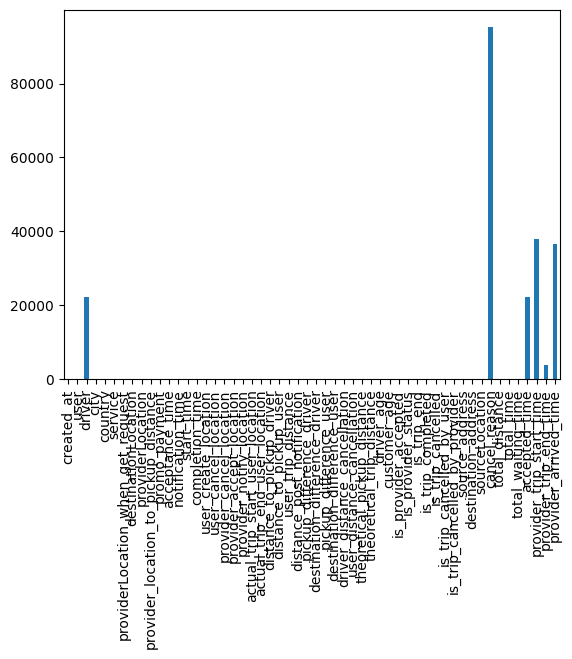

In [8]:
trips.isna().sum().plot(kind='bar')

In [9]:
clean_trips = trips.dropna()
print(clean_trips.isna().any())

created_at                              False
user                                    False
driver                                  False
city                                    False
country                                 False
service                                 False
providerLocation_when_get_request       False
destinationLocation                     False
providerLocation                        False
provider_location_to_pickup_distance    False
promo_payment                           False
acceptance_time                         False
notification_time                       False
start_time                              False
completion_time                         False
user_create_location                    False
user_cancel_location                    False
provider_cancel_location                False
provider_accept_location                False
provider_notify_location                False
actual_trip_start_user_location         False
actual_trip_end_user_location     

## **Taux d'acceptation des courses**

In [10]:
#pourcentage de courses acceptées par les chauffeurs
total_request = len(trips)
accepted_request = trips['driver'].notna().sum()
accepted_request_percent = (accepted_request/total_request)*100
print(f"Pourcentage de courses acceptées par les chauffeurs : {accepted_request_percent}")


#pourcentage de refus de course par heure de la journée
trips['created_at'] = pd.to_datetime(trips['created_at'])
trips['heure'] = trips['created_at'].dt.hour
refus_par_heure = trips[trips['driver'].isna()].groupby('heure').size()
total_requete_par_heure = trips.groupby('heure').size()
pourcentage_refus_par_heure = (refus_par_heure / total_requete_par_heure) * 100
print(f"\n\nPourcentage de refus de course par heure de la journée: \n{pourcentage_refus_par_heure.sort_values(ascending=False)}")

#pourcentage de refus de course par heure de la journée
print(f"\n\nNombre de requete de course par heure de la journée: \n{total_requete_par_heure.sort_values(ascending=False)}")


# Refus de course par ville
refus_par_ville = trips[trips['driver'].isna()].groupby('city').size()
print(f"\n\nRefus de course par ville : {refus_par_ville.sort_values(ascending=False)}")


# Motifs de refus de course en fonction du type de service
refus_par_service = trips[trips['driver'].isna()].groupby('service').size()
print(f"\n\nMotifs de refus de course en fonction du type de service : {refus_par_service}")

# Refus de course par ville et en fonction du type de service
refus_par_ville_service = trips[trips['driver'].isna()].groupby(['city','service']).size()
print(f"\n\nRefus de course par ville et en foction du service: \n{refus_par_ville_service.sort_values(ascending=False)}")

# Corrélation entre la durée d'attente et les refus de course
attente_acceptee = trips[trips['driver'].notna()]['acceptance_time'].mean()
attente_refusee = trips[trips['driver'].isna()]['acceptance_time'].mean()
print(f"\n\nDurée moyenne d'attente pour les courses acceptées : {attente_acceptee}")
print(f"\n\nDurée moyenne d'attente pour les courses refusées : {attente_refusee}" )


# Principales raisons d'annulation des courses
refus_par_raison = trips[trips['driver'].isna()].groupby('cancel_reason').size()
print(f"\n\nPrincipales raisons d'annulation des courses : \n{refus_par_raison}")



Pourcentage de courses acceptées par les chauffeurs : 78.64265501376403


Pourcentage de refus de course par heure de la journée: 
heure
4     43.273543
5     43.026205
2     37.416107
3     33.660934
1     33.075933
0     31.791421
6     30.509764
17    28.899652
18    27.670251
23    25.281474
16    22.903648
19    21.593090
7     21.297778
15    20.230769
13    18.429158
20    18.279348
21    17.138194
22    16.994819
8     16.927732
14    16.616717
10    16.513443
11    16.447368
12    16.359290
9     15.103794
dtype: float64


Nombre de requete de course par heure de la journée: 
heure
18    8370
17    8052
16    6881
15    6500
19    6252
14    6006
12    5856
13    5844
10    5765
7     5625
11    5624
8     5618
9     5588
20    4847
6     3943
21    3676
22    2895
23    1954
0     1189
5     1183
1      777
2      596
4      446
3      407
dtype: int64


Refus de course par ville : city
Lome          11496
Cotonou        7342
Porto-Novo      728
Kara            697
Parakou   

## **Durée moyenne d'une course**

In [11]:
#durée moyenne d'une course
trips['provider_trip_start_time'] = pd.to_datetime(trips['provider_trip_start_time'])
trips['provider_trip_end_time'] = pd.to_datetime(trips['provider_trip_end_time'])
trips['duree_course'] = trips['provider_trip_end_time'] - trips['provider_trip_start_time']
duree_moyenne_course = trips['duree_course'].mean()
print(f"Durée moyenne des courses : {duree_moyenne_course}" )


# Par ville
duree_moyenne_par_ville = trips.groupby('city')['duree_course'].mean()


# Par service
duree_moyenne_par_service = trips.groupby('service')['duree_course'].mean()

# Par service et Par ville
duree_moyenne_par_service_ville = trips.groupby(['city','service'])['duree_course'].mean()


# Par moment de la journée
trips['heure_debut_course'] = trips['provider_trip_start_time'].dt.hour
trips['categorie_heure'] = pd.cut(trips['heure_debut_course'], bins=[0, 6, 12, 18, 24], labels=['Nuit', 'Matin', 'Après-midi', 'Soirée'])
duree_moyenne_par_heure = trips.groupby('categorie_heure')['duree_course'].mean()


print(f"Durée moyenne des courses par ville : {duree_moyenne_par_ville.sort_values(ascending=False)}")
print(f"\n\n\nDurée moyenne des courses par service : {duree_moyenne_par_service.sort_values(ascending=False)}")
print(f"\n\n\nDurée moyenne des courses par service et par ville: {duree_moyenne_par_service_ville.sort_values(ascending=False)}")
print(f"\n\n\nDurée moyenne des courses par moment de la journée : {duree_moyenne_par_heure.sort_values(ascending=False)}")


Durée moyenne des courses : 0 days 00:22:26.389271712
Durée moyenne des courses par ville : city
Natitingou   0 days 00:50:50.269448837
Tsévié       0 days 00:39:26.032441176
Parakou      0 days 00:25:27.680276800
Bohicon      0 days 00:25:13.368816091
Cotonou      0 days 00:24:48.870014409
Atakpame     0 days 00:24:44.112965034
Libreville   0 days 00:21:38.111237315
Lome         0 days 00:21:19.723781496
Porto-Novo   0 days 00:19:05.024294167
Kara         0 days 00:15:36.751323645
Kpalime                            NaT
Name: duree_course, dtype: timedelta64[ns]



Durée moyenne des courses par service : service
Tricycle   0 days 00:26:51.707571627
Voiture    0 days 00:22:57.961257949
Zem        0 days 00:21:56.391116667
Name: duree_course, dtype: timedelta64[ns]



Durée moyenne des courses par service et par ville: city        service 
Lome        Tricycle   0 days 00:52:49.552947368
Natitingou  Zem        0 days 00:50:50.269448837
Porto-Novo  Voiture       0 days 00:44:09.121000
Tsé

## **Temps d'attente moyen pour les clients avant qu'un chauffeur accepte sa commande**

In [12]:
#la durée moyenne d'attente (cette partir est à revoire , les données sont peut etre biaisées)
trips['acceptance_time'] = pd.to_datetime(trips['acceptance_time'])
trips['duree_attente'] = trips['acceptance_time'] - trips['created_at']
# trips = trips[trips['duree_attente'] >= pd.Timedelta(0)]
duree_moyenne_attente = trips['duree_attente'].mean()
print("Durée moyenne d'attente avant qu'un chauffeur n'accepte la demande :", duree_moyenne_attente)


# Par ville
duree_moyenne_attente_par_ville = trips.groupby('city')['duree_attente'].mean()


# Par service
duree_moyenne_attente_par_service = trips.groupby('service')['duree_attente'].mean()


print(f"\n\nDurée moyenne d'attente par ville : {duree_moyenne_attente_par_ville}")
print(f"\n\nDurée moyenne d'attente par service : {duree_moyenne_attente_par_service}")




Durée moyenne d'attente avant qu'un chauffeur n'accepte la demande : -18787 days +08:48:53.685414912


Durée moyenne d'attente par ville : city
Atakpame     -18788 days +12:03:00.813197568
Bohicon      -18787 days +23:54:11.321004544
Cotonou      -18787 days +12:06:13.829228032
Kara         -18787 days +09:13:59.470051584
Kpalime         -18794 days +06:00:01.135200
Libreville   -18787 days +03:41:18.544062976
Lome         -18787 days +06:32:35.509814016
Natitingou   -18786 days +03:49:59.210043904
Parakou      -18787 days +15:46:11.400275968
Porto-Novo   -18787 days +12:30:38.882670592
Tsévié       -18787 days +06:12:58.177865984
Name: duree_attente, dtype: timedelta64[ns]


Durée moyenne d'attente par service : service
Tricycle   -18787 days +03:24:24.533988608
Voiture    -18787 days +04:20:34.247344128
Zem        -18787 days +11:56:12.493294336
Name: duree_attente, dtype: timedelta64[ns]


In [13]:
print(trips['is_trip_cancelled_by_user'].shape)
print(trips.head())

(103894,)
                   created_at      user   driver     city country  service  \
index                                                                        
0     2021-06-01 00:00:45.825  U_620443  D_19374     Lome    Togo      Zem   
1     2021-06-01 00:03:46.748  U_570883  D_11832  Parakou   Benin      Zem   
3     2021-06-01 00:04:11.567   U_03628      NaN     Lome    Togo      Zem   
4     2021-06-01 00:07:59.870  U_376951  D_68144     Lome    Togo      Zem   
6     2021-06-01 00:11:19.831  U_999184  D_91842     Lome    Togo  Voiture   

      providerLocation_when_get_request     destinationLocation  \
index                                                             
0                [6.2060932, 1.2537946]  [6.1833133, 1.2368867]   
1                [9.3272261, 2.6177889]   [9.321576, 2.6284832]   
3                                    []  [6.1663386, 1.2665748]   
4                [6.2262907, 1.2019779]  [6.2090403, 1.2041535]   
6                [6.1676712, 1.2024712]  

# **Taux d'annulation**



Pourcentage de courses annulées par les clients : 29.280805436310086


Pourcentage de courses annulées par les chauffeurs : 3.5719098311740813


Raisons les plus courantes d'annulation : 
No drivers available @ trip service                      3756
 Due To Medical Emergency                                1570
Mon client et moi ne pouvions pas nous rencontrer.       1054
Le temps estimé d'arrivée était trop long.                971
Mauvaise adresse ou emplacement non indiqué.              287
Mon chauffeur et moi ne pouvions pas nous rencontrer.     206
Mauvaise adresse ou emplacement indiqué.                  196
No drivers available @ create                             103
Wrong address or location shown.                           16
The ETA was too long.                                      13
My client and I couldn't connect.                           7
crevaison                                                   6
My driver and I couldn't connect.                           5
Chan

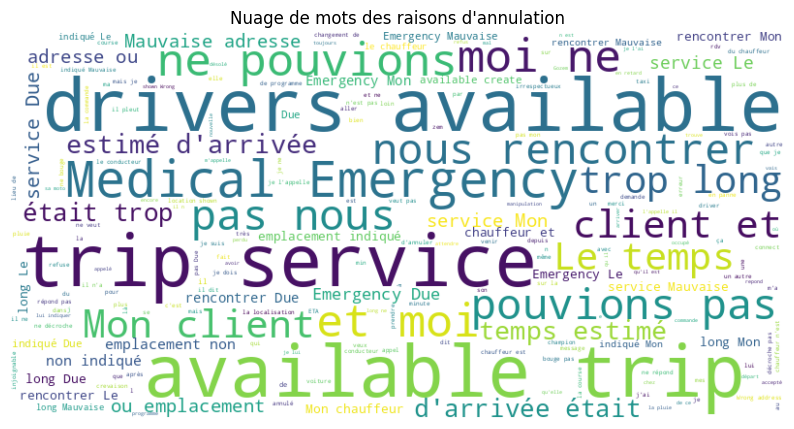

In [14]:
annulations_clients = trips[trips['is_trip_cancelled_by_user'] == True].shape[0]
annulations_chauffeurs = trips[trips['is_trip_cancelled_by_provider'] == True].shape[0]
total_courses = trips.shape[0]

#pourcentage de courses annulées par les clients et par les chauffeurs
pourcentage_annulations_clients = (annulations_clients / total_courses) * 100
pourcentage_annulations_chauffeurs = (annulations_chauffeurs / total_courses) * 100
print("\n\nPourcentage de courses annulées par les clients :", pourcentage_annulations_clients)
print("\n\nPourcentage de courses annulées par les chauffeurs :", pourcentage_annulations_chauffeurs)

#les 15 top raisons d'annulation
raisons_annulation = trips['cancel_reason'].value_counts()
print(f"\n\nRaisons les plus courantes d'annulation : \n{raisons_annulation[:15]}")

#visualisation des raisons d'annulations des commandes
cancel_reasons_text = ' '.join(trips['cancel_reason'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cancel_reasons_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuage de mots des raisons d\'annulation')
plt.axis('off')
plt.show()

### **Performance et efficacité des champions**

In [15]:
#Quel est le temps moyen mis par un champion pour accepter une requête de course ?
trips['accepted_time'] = pd.to_datetime(trips['accepted_time'])
accepted_requests = trips.dropna(subset=['accepted_time']).copy()
accepted_requests['response_time'] = (accepted_requests['accepted_time'] - accepted_requests['created_at']).dt.total_seconds()
mean_response_time = accepted_requests['response_time'].mean()
print("Le temps moyen de réponse des champions est de:", mean_response_time, "secondes.")


#Quelle est la durée moyenne entre l'acceptation d'une course par un champion et son arrivée notifiée au client ?
trips['provider_arrived_time'] = pd.to_datetime(trips['provider_arrived_time'])
arrived_requests = trips.dropna(subset=['provider_arrived_time']).copy()
arrived_requests['arrival_time_difference'] = (arrived_requests['provider_arrived_time'] - arrived_requests['accepted_time']).dt.total_seconds()
mean_arrival_time_difference = arrived_requests['arrival_time_difference'].mean()
print("\nLa durée moyenne entre l'acceptation de la course par un champion et son arrivée notifiée au client est de:", mean_arrival_time_difference, "secondes.")


#Quel est le temps moyen nécessaire pour un champion entre la notification de son arrivée et le début effectif de la course ?
trips['provider_trip_start_time'] = pd.to_datetime(trips['provider_trip_start_time'])
started_trips = trips.dropna(subset=['provider_arrived_time', 'provider_trip_start_time']).copy()
started_trips['start_time_difference'] = (started_trips['provider_trip_start_time'] - started_trips['provider_arrived_time']).dt.total_seconds()
mean_start_time_difference = started_trips['start_time_difference'].mean()
print("\nLe temps moyen nécessaire pour un champion entre la notification de son arrivée et le début effectif de la course est de:", mean_start_time_difference, "secondes.")


#Quelle est la durée moyenne de complétion d'une course par un champion ?
trips['provider_trip_start_time'] = pd.to_datetime(trips['provider_trip_start_time'])
trips['provider_trip_end_time'] = pd.to_datetime(trips['provider_trip_end_time'])
completed_trips = trips.dropna(subset=['provider_trip_start_time', 'provider_trip_end_time']).copy()
completed_trips['completion_time'] = (completed_trips['provider_trip_end_time'] - completed_trips['provider_trip_start_time']).dt.total_seconds()
mean_completion_time = completed_trips['completion_time'].mean()
print("\nLa durée moyenne de complétion d'une course par un champion est de:", mean_completion_time, "secondes.")


#Quel pourcentage de courses sont complétées avec succès par les champions ?
total_trips = len(trips)
successful_trips = trips['is_trip_completed'].sum()
percentage_successful_trips = (successful_trips / total_trips) * 100
print("\nLe pourcentage de courses complétées avec succès par les champions est de:", percentage_successful_trips, "%.")

Le temps moyen de réponse des champions est de: 20.744150859800502 secondes.

La durée moyenne entre l'acceptation de la course par un champion et son arrivée notifiée au client est de: 601.2778442066146 secondes.

Le temps moyen nécessaire pour un champion entre la notification de son arrivée et le début effectif de la course est de: 141.65460370482842 secondes.

La durée moyenne de complétion d'une course par un champion est de: 1346.389271712724 secondes.

Le pourcentage de courses complétées avec succès par les champions est de: 63.36650817179048 %.


### **Analyse de la géographique**

In [16]:
#Quelles sont les zones les plus fréquentées pour les courses ?
grouped_trips = trips.groupby(['sourceLocation'])
frequent_zones = grouped_trips.size().sort_values(ascending=False)
print("Les zones les plus fréquentées pour les courses (par position de départ) :")
print(frequent_zones.head(10))





Les zones les plus fréquentées pour les courses (par position de départ) :
sourceLocation
[6.2011157, 1.1881855]                     60
[6.121765799999999, 1.210199]              60
[6.385448899999999, 2.4591436]             57
[6.3702928, 2.391236199999999]             52
[0.4513695, 9.4213235]                     51
[6.369256188566126, 2.4355413392186165]    51
[6.4214807, 2.3431305]                     47
[6.2087944, 1.158333]                      46
[6.209329299999998, 1.1729944]             45
[6.367485599999999, 2.4233417]             43
dtype: int64


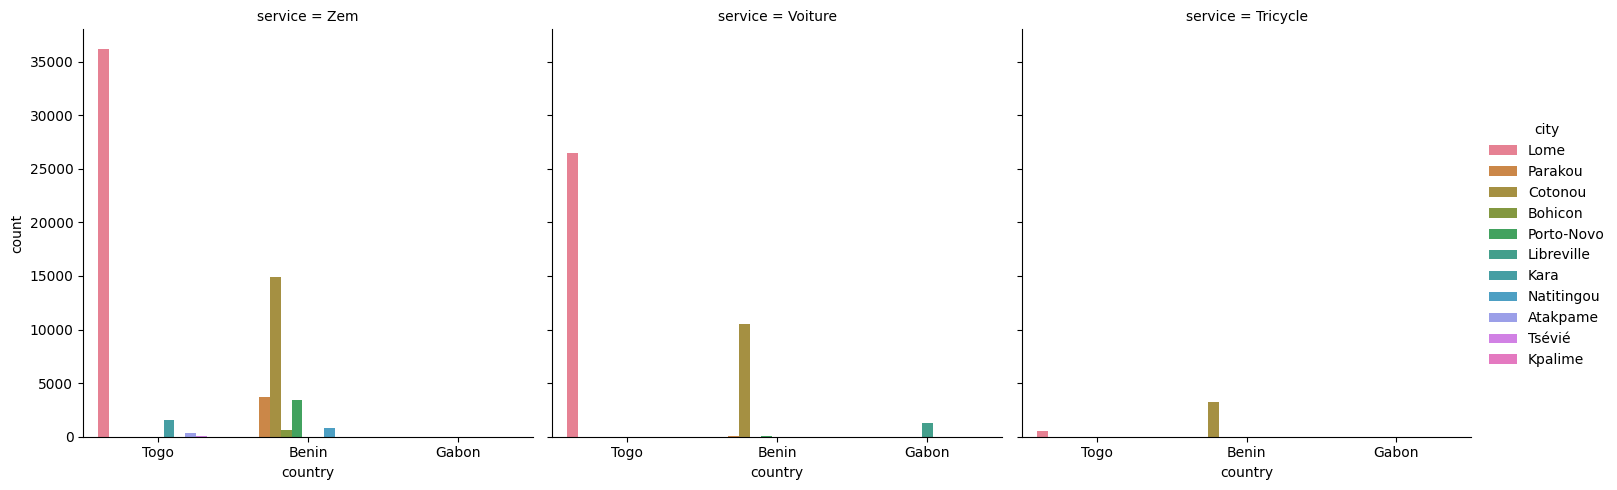

In [17]:
#nombre de commande par pays
sns.catplot(x='country',kind="count",data=trips,hue='city',col='service')
plt.show()

In [18]:
def extract_coordinates(location):
    cleaned_location = location.strip('[]').strip()
    latitude, longitude = cleaned_location.split(',')
    return pd.Series([latitude, longitude], index=['latitude', 'longitude'])
trips[['sourceLocation_latitude', 'sourceLocation_longitude']] = trips['sourceLocation'].apply(extract_coordinates)
trips[['destinationLocation_latitude', 'destinationLocation_longitude']] = trips['destinationLocation'].apply(extract_coordinates)
# print(trips.head())

m = folium.Map(location=[1000, 1000], zoom_start=12)

# Ajouter des marqueurs pour chaque point de départ et de destination des trajets
for index, row in trips.iterrows():
    # Marqueur pour le point de départ
    folium.Marker(location=[row["sourceLocation_latitude"], row["sourceLocation_longitude"]],
                  popup="Départ").add_to(m)
    # Marqueur pour le point de destination
    folium.Marker(location=[row["destinationLocation_latitude"], row["destinationLocation_longitude"]],
                  popup="Destination").add_to(m)
    # Ligne pour représenter le trajet entre le point de départ et la destination
    folium.PolyLine(locations=[(row["sourceLocation_latitude"], row["sourceLocation_longitude"]),
                               (row["destinationLocation_latitude"], row["destinationLocation_longitude"])],
                    color='blue').add_to(m)

# Afficher la carte
m

RecursionError: maximum recursion depth exceeded while calling a Python object

# **drivers_activities_logs**

In [20]:
drivers_activities_logs = pd.read_csv("drivers_activities_logs.csv",index_col=0)
print(drivers_activities_logs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21169 entries, 0 to 21168
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_server_timezone  21169 non-null  object 
 1   driver                21169 non-null  object 
 2   received              21169 non-null  int64  
 3   accepted              21169 non-null  int64  
 4   rejected              21169 non-null  int64  
 5   not_answered          21169 non-null  int64  
 6   cancelled             21169 non-null  int64  
 7   completed             21169 non-null  int64  
 8   acception_ratio       21169 non-null  float64
 9   rejection_ratio       21169 non-null  int64  
 10  cancellation_ratio    21169 non-null  float64
 11  completed_ratio       21169 non-null  float64
 12  total_online_time     21169 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 2.3+ MB
None


In [21]:
print(drivers_activities_logs.shape)

(21169, 13)


In [ ]:
print(drivers_activities_logs.head())

### **Quel est le taux global d'acceptation des demandes de course par les conducteurs ?**

In [ ]:
#le taux global d'acceptation des demandes de course par les conducteurs
total_requests_received = drivers_activities_logs['received'].sum()
total_requests_accepted = drivers_activities_logs['accepted'].sum()
acceptance_rate = (total_requests_accepted / total_requests_received) * 100
print("Le taux global d'acceptation des demandes de course par les conducteurs est de {:.2f}%".format(acceptance_rate))



# **Quel est le taux de rejet des demandes de course par les conducteurs ?**

In [ ]:
# le taux de rejet des demandes de course par les conducteurs
rejection_rate = (total_requests_rejected / total_requests_received) * 100
print("Le taux de rejet des demandes de course par les conducteurs est de {:.2f}%".format(rejection_rate))

# **Quel est le taux d'annulation des courses par les conducteurs ?**

In [ ]:
total_requests_cancelled = drivers_activities_logs['cancelled'].sum()
cancellation_rate = (total_requests_cancelled / total_requests_accepted) * 100
print("Le taux d'annulation des courses par les conducteurs est de {:.2f}%".format(cancellation_rate))

# **Quel est le taux de complétion des courses par les conducteurs ?**

In [ ]:
total_requests_completed = drivers_activities_logs['completed'].sum()
completion_rate = (total_requests_completed / total_requests_accepted) * 100
print("Le taux de complétion des courses par les conducteurs est de {:.2f}%".format(completion_rate))

# **Quelle est la durée moyenne de la période en ligne des conducteurs ?**

In [ ]:
# Calcul de la durée totale en ligne pour chaque conducteur
total_online_time_per_driver = drivers_activities_logs.groupby('driver')['total_online_time'].sum()

# Calcul de la durée moyenne de la période en ligne des conducteurs
mean_online_time = total_online_time_per_driver.mean()

# Conversion de la durée moyenne en un format plus convivial (heures, minutes, secondes)
mean_online_time_hours = mean_online_time // 3600
mean_online_time_minutes = (mean_online_time % 3600) // 60
mean_online_time_seconds = mean_online_time % 60

print("La durée moyenne de la période en ligne des conducteurs est de : {} heures, {} minutes et {:.2f} secondes.".format(
    int(mean_online_time_hours),
    int(mean_online_time_minutes),
    mean_online_time_seconds
))
